In [9]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
edges = [('bldgclass', 'subsidies_flag'), ('bldgclass', 'ownertype'), ('bldgclass', 'residfar'), ('bldgclass', 'yearbuilt'), ('bldgclass', 'violations'), ('bldgclass', 'landuse'), ('residfar', 'violations'), ('residfar', 'subsidies_flag'), ('violations', 'yearbuilt'), ('violations', 'subsidies_flag'), ('violations', 'ownertype'), ('violations', 'unitsres'), ('landuse', 'residfar'), ('landuse', 'violations'), ('landuse', 'unitsres')]
nodes = ['bldgclass', 'subsidies_flag', 'ownertype',
         'residfar', 'yearbuilt', 'violations',
         'landuse', 'subsidies_flag', 'unitsres']

In [64]:
year = ['2014', '2015', '2016', '2017', '2018']

no_ur = [[('bldgclass', 'subsidies_flag'), ('bldgclass', 'ownertype'), ('bldgclass', 'residfar'), ('bldgclass', 'yearbuilt'), ('bldgclass', 'violations'), ('bldgclass', 'landuse'), ('residfar', 'violations'), ('residfar', 'subsidies_flag'), ('violations', 'yearbuilt'), ('violations', 'subsidies_flag'), ('violations', 'ownertype'), ('violations', 'unitsres'), ('landuse', 'residfar'), ('landuse', 'violations'), ('landuse', 'unitsres')],
[('bldgclass', 'residfar'), ('bldgclass', 'yearbuilt'), ('bldgclass', 'violations'), ('bldgclass', 'landuse'), ('bldgclass', 'ownertype'), ('subsidies_flag', 'residfar'), ('subsidies_flag', 'violations'), ('subsidies_flag', 'bldgclass'), ('subsidies_flag', 'affordability_flag'), ('residfar', 'violations'), ('residfar', 'landuse'), ('violations', 'yearbuilt'), ('violations', 'landuse'), ('violations', 'ownertype'), ('violations', 'unitsres'), ('landuse', 'unitsres')],
[('bldgclass', 'residfar'), ('bldgclass', 'yearbuilt'), ('bldgclass', 'violations'), ('bldgclass', 'ownertype'), ('bldgclass', 'subsidies_flag'), ('subsidies_flag', 'affordability_flag'), ('residfar', 'violations'), ('residfar', 'subsidies_flag'), ('violations', 'yearbuilt'), ('violations', 'subsidies_flag'), ('violations', 'ownertype'), ('violations', 'unitsres'), ('violations', 'affordability_flag'), ('landuse', 'residfar'), ('landuse', 'violations'), ('landuse', 'unitsres'), ('landuse', 'bldgclass')],
[('bldgclass', 'residfar'), ('bldgclass', 'yearbuilt'), ('bldgclass', 'violations'), ('bldgclass', 'ownertype'), ('bldgclass', 'subsidies_flag'), ('residfar', 'violations'), ('residfar', 'subsidies_flag'), ('violations', 'yearbuilt'), ('violations', 'subsidies_flag'), ('violations', 'ownertype'), ('violations', 'unitsres'), ('landuse', 'residfar'), ('landuse', 'violations'), ('landuse', 'unitsres'), ('landuse', 'bldgclass')],
[('bldgclass', 'residfar'), ('bldgclass', 'violations'), ('bldgclass', 'landuse'), ('bldgclass', 'ownertype'), ('bldgclass', 'subsidies_flag'), ('subsidies_flag', 'ownertype'), ('subsidies_flag', 'affordability_flag'), ('ownertype', 'affordability_flag'), ('residfar', 'violations'), ('residfar', 'subsidies_flag'), ('yearbuilt', 'bldgclass'), ('violations', 'subsidies_flag'), ('violations', 'ownertype'), ('violations', 'unitsres'), ('landuse', 'residfar'), ('landuse', 'violations'), ('landuse', 'unitsres')]]

no_urOS = [0.882711132, 0.887873916, 0.892313936, 0.892172778, 0.887740949]

ur = [[('bldgclass', 'violations'), ('bldgclass', 'landuse'), ('bldgclass', 'ownertype'), ('bldgclass', 'subsidies_flag'), ('residfar', 'unit_ratio'), ('residfar', 'violations'), ('residfar', 'landuse'), ('residfar', 'yearbuilt'), ('residfar', 'bldgclass'), ('yearbuilt', 'violations'), ('yearbuilt', 'ownertype'), ('yearbuilt', 'subsidies_flag'), ('yearbuilt', 'bldgclass'), ('unit_ratio', 'yearbuilt'), ('unit_ratio', 'bldgclass'), ('violations', 'subsidies_flag'), ('violations', 'landuse')],
[('bldgclass', 'subsidies_flag'), ('bldgclass', 'ownertype'), ('bldgclass', 'residfar'), ('bldgclass', 'yearbuilt'), ('bldgclass', 'unit_ratio'), ('bldgclass', 'violations'), ('residfar', 'violations'), ('yearbuilt', 'residfar'), ('yearbuilt', 'unit_ratio'), ('yearbuilt', 'subsidies_flag'), ('yearbuilt', 'ownertype'), ('unit_ratio', 'residfar'), ('unit_ratio', 'violations'), ('violations', 'subsidies_flag'), ('landuse', 'yearbuilt'), ('landuse', 'bldgclass')],
[('bldgclass', 'residfar'), ('bldgclass', 'violations'), ('bldgclass', 'landuse'), ('bldgclass', 'ownertype'), ('bldgclass', 'subsidies_flag'), ('subsidies_flag', 'violations'), ('yearbuilt', 'residfar'), ('yearbuilt', 'violations'), ('yearbuilt', 'subsidies_flag'), ('yearbuilt', 'bldgclass'), ('unit_ratio', 'yearbuilt'), ('unit_ratio', 'bldgclass'), ('violations', 'residfar'), ('violations', 'landuse')],
[('bldgclass', 'subsidies_flag'), ('bldgclass', 'ownertype'), ('bldgclass', 'residfar'), ('bldgclass', 'yearbuilt'), ('bldgclass', 'unit_ratio'), ('bldgclass', 'violations'), ('residfar', 'unit_ratio'), ('residfar', 'violations'), ('residfar', 'yearbuilt'), ('yearbuilt', 'unit_ratio'), ('yearbuilt', 'violations'), ('yearbuilt', 'ownertype'), ('yearbuilt', 'subsidies_flag'), ('violations', 'subsidies_flag'), ('landuse', 'residfar'), ('landuse', 'bldgclass')],
[('bldgclass', 'subsidies_flag'), ('bldgclass', 'ownertype'), ('bldgclass', 'residfar'), ('bldgclass', 'yearbuilt'), ('bldgclass', 'unit_ratio'), ('bldgclass', 'violations'), ('subsidies_flag', 'ownertype'), ('residfar', 'unit_ratio'), ('residfar', 'violations'), ('yearbuilt', 'residfar'), ('yearbuilt', 'unit_ratio'), ('yearbuilt', 'violations'), ('yearbuilt', 'subsidies_flag'), ('violations', 'subsidies_flag'), ('violations', 'ownertype'), ('landuse', 'residfar'), ('landuse', 'yearbuilt'), ('landuse', 'bldgclass')]
]

urOS = [0.896181828, 0.888207647, 0.908843884, 0.893419915, 0.888379123]

vio_count = [[('bldgclass', 'unit_ratio'), ('bldgclass', 'violations'), ('bldgclass', 'yearbuilt'), ('bldgclass', 'subsidies_flag'), ('residfar', 'subsidies_flag'), ('residfar', 'landuse'), ('residfar', 'yearbuilt'), ('residfar', 'bldgclass'), ('yearbuilt', 'unit_ratio'), ('yearbuilt', 'violations'), ('landuse', 'bldgclass')],
[('bldgclass', 'unit_ratio'), ('bldgclass', 'subsidies_flag'), ('bldgclass', 'yearbuilt'), ('bldgclass', 'violations'), ('subsidies_flag', 'residfar'), ('residfar', 'yearbuilt'), ('yearbuilt', 'unit_ratio'), ('yearbuilt', 'violations'), ('landuse', 'residfar'), ('landuse', 'bldgclass')],
[('bldgclass', 'unit_ratio'), ('bldgclass', 'violations'), ('bldgclass', 'yearbuilt'), ('bldgclass', 'subsidies_flag'), ('residfar', 'landuse'), ('yearbuilt', 'subsidies_flag'), ('landuse', 'bldgclass')],
[('bldgclass', 'unit_ratio'), ('bldgclass', 'subsidies_flag'), ('bldgclass', 'landuse'), ('residfar', 'subsidies_flag'), ('yearbuilt', 'residfar'), ('yearbuilt', 'unit_ratio'), ('yearbuilt', 'violations'), ('yearbuilt', 'landuse'), ('yearbuilt', 'bldgclass'), ('violations', 'bldgclass'), ('landuse', 'residfar')],
[('bldgclass', 'unit_ratio'), ('bldgclass', 'subsidies_flag'), ('bldgclass', 'landuse'), ('residfar', 'subsidies_flag'), ('yearbuilt', 'residfar'), ('yearbuilt', 'unit_ratio'), ('yearbuilt', 'violations'), ('yearbuilt', 'landuse'), ('yearbuilt', 'bldgclass'), ('violations', 'bldgclass'), ('landuse', 'residfar')]
]

vio_countIS = [0.653413744, 0.63526717, 0.615742175, 0.595108402, 0.568992961]
vio_countOS = [0.641453246, 0.632407672, 0.620817844, 0.597893522, 0.556027165]

vio_rt = [[('bldgclass', 'unit_ratio'), ('bldgclass', 'subsidies_flag'), ('bldgclass', 'yearbuilt'), ('bldgclass', 'vio_rt'), ('rsidfar', 'subsidies_flag'), ('residfar', 'landuse'), ('residfar', 'yearbuilt'), ('residfar', 'bldgclass'), ('yearbuilt', 'unit_ratio'), ('yearbuilt', 'vio_rt'), ('landuse', 'bldgclass')],
[('bldgclass', 'unit_ratio'), ('bldgclass', 'subsidies_flag'), ('bldgclass', 'yearbuilt'), ('bldgclass', 'vio_rt'), ('subsidies_flag', 'residfar'), ('residfar', 'yearbuilt'), ('yearbuilt', 'unit_ratio'), ('yearbuilt', 'vio_rt'), ('landuse', 'residfar'), ('landuse', 'bldgclass')],
[('bldgclass', 'unit_ratio'), ('bldgclass', 'subsidies_flag'), ('bldgclass', 'yearbuilt'), ('bldgclass', 'vio_rt'), ('residfar', 'landuse'), ('yearbuilt', 'subsidies_flag'), ('landuse', 'bldgclass')],
[('bldgclass', 'unit_ratio'), ('bldgclass', 'subsidies_flag'), ('bldgclass', 'yearbuilt'), ('bldgclass', 'vio_rt'), ('residfar', 'subsidies_flag'), ('residfar', 'landuse'), ('residfar', 'yearbuilt'), ('residfar', 'bldgclass'), ('yearbuilt', 'unit_ratio'), ('yearbuilt', 'vio_rt'), ('landuse', 'bldgclass')],
[('bldgclass', 'unit_ratio'), ('bldgclass', 'subsidies_flag'), ('bldgclass', 'landuse'), ('bldgclass', 'vio_rt'), ('residfar', 'subsidies_flag'), ('yearbuilt', 'residfar'), ('yearbuilt', 'unit_ratio'), ('yearbuilt', 'landuse'), ('yearbuilt', 'vio_rt'), ('yearbuilt', 'bldgclass'), ('landuse', 'residfar')]
]

vio_rtIS = [0.371751917, 0.353602233, 0.335709121, 0.348796941, 0.349686958]
vio_rtOS = [0.388624181, 0.35098769, 0.334572491, 0.34410619, 0.361488398]

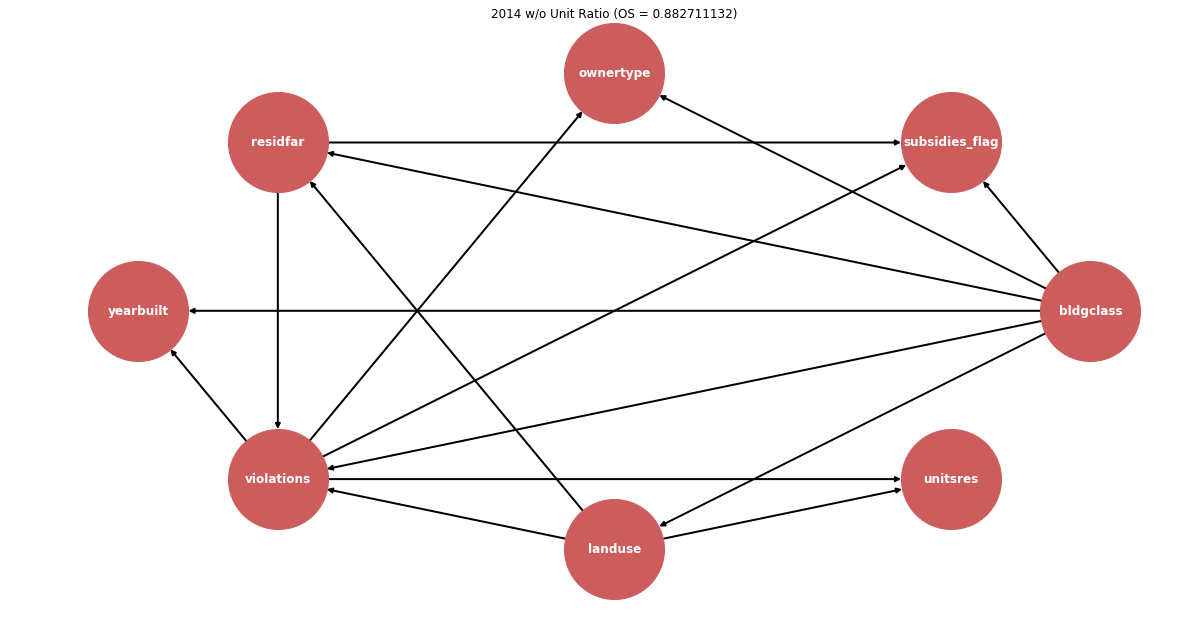

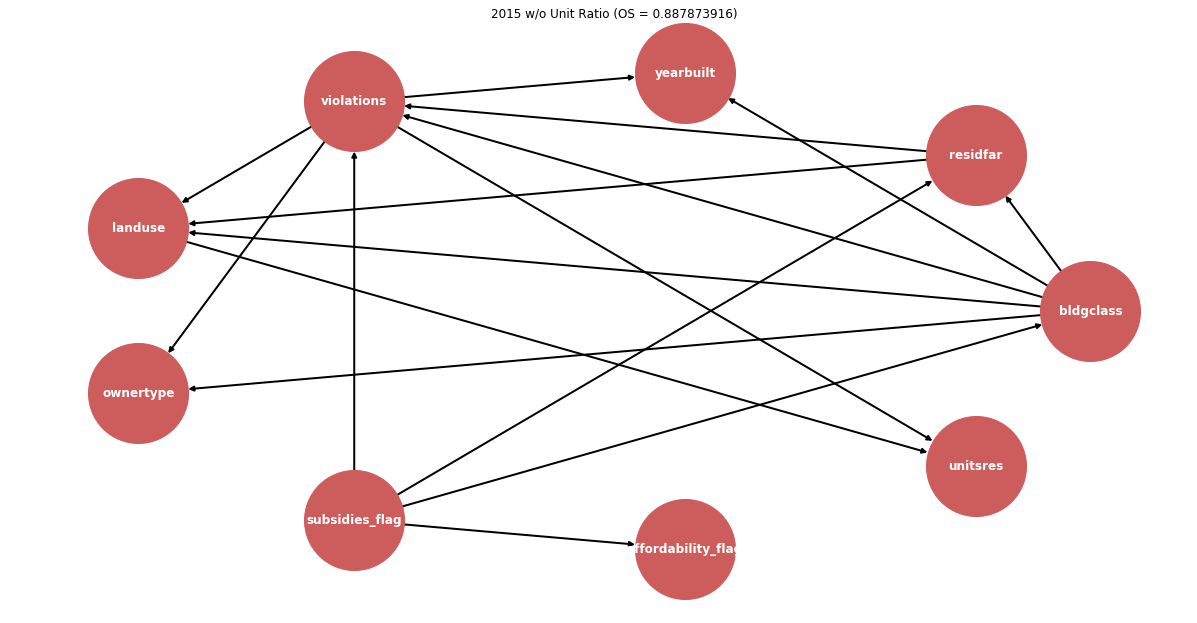

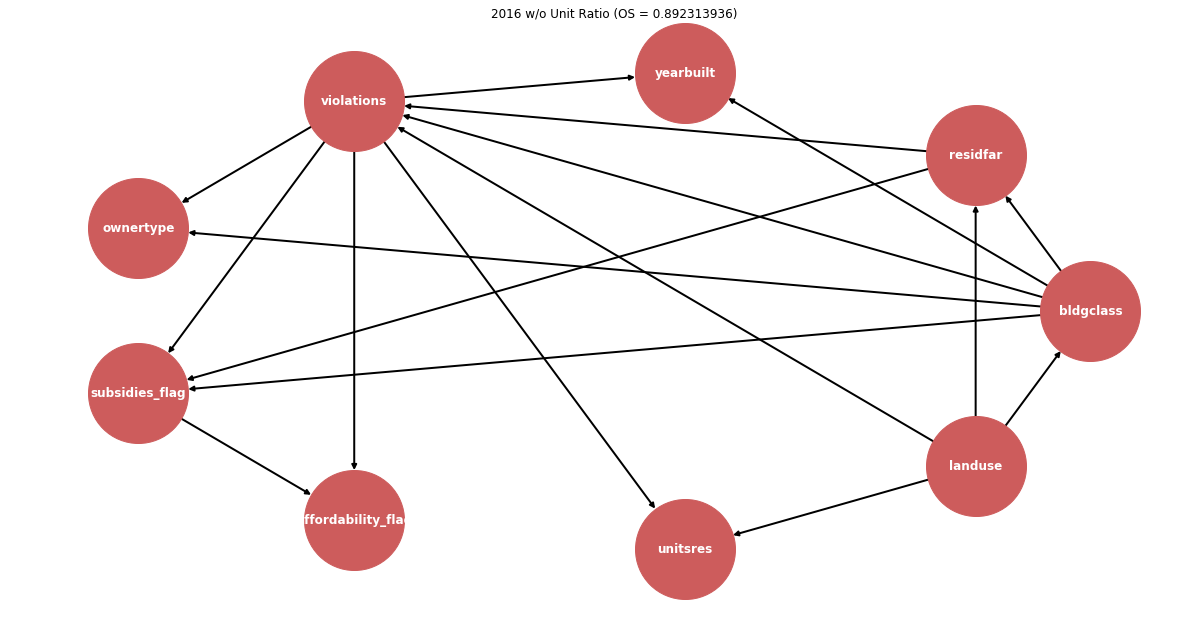

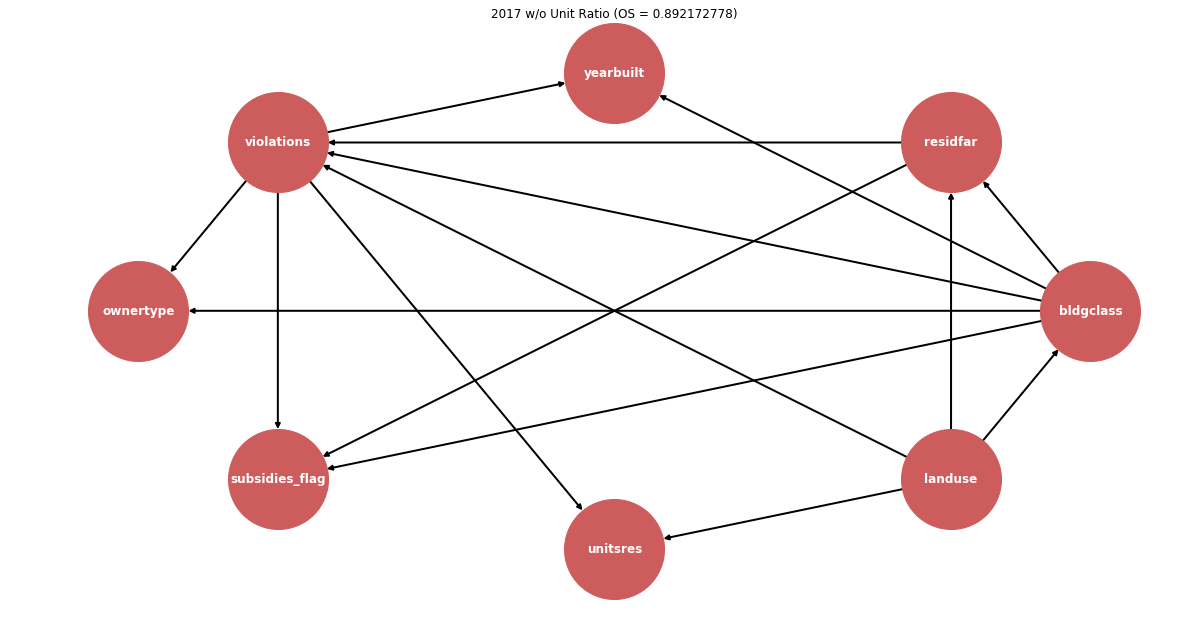

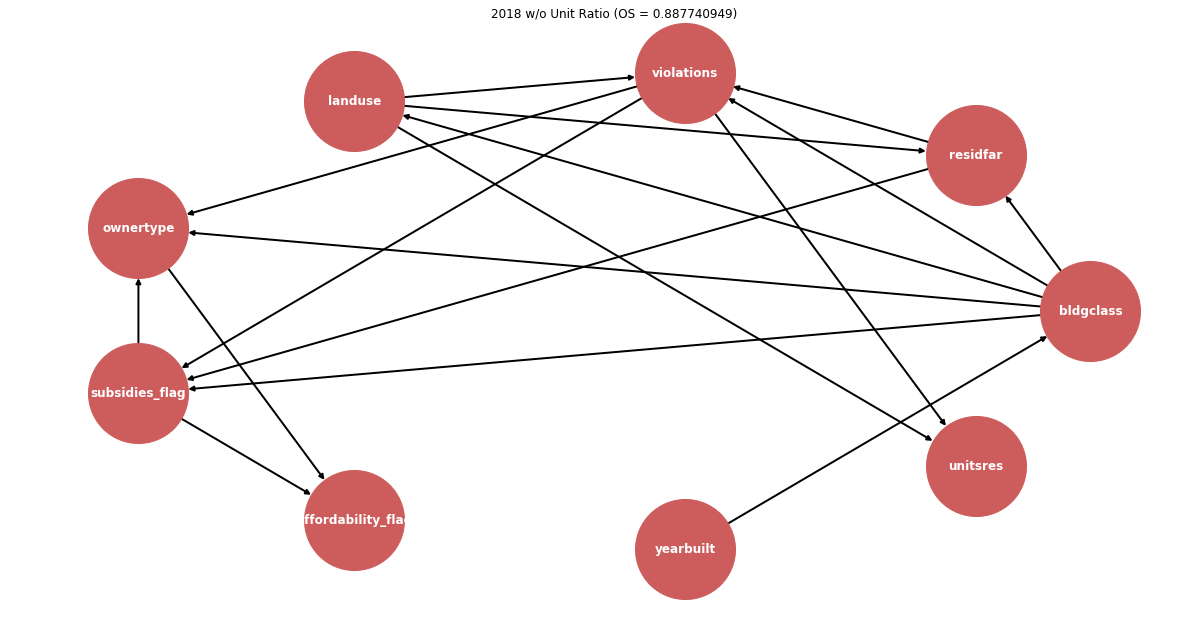

In [76]:
for i in range(5):
    g = nx.DiGraph()
    g.add_edges_from(no_ur[i])
    plt.figure(figsize=(16,8))
    nx.draw_shell(g,
            with_labels=True,
            font_weight='bold',
            font_color='white',
            node_size=10000,
            node_color='indianred',
            width=2)
    plt.title('{} w/o Unit Ratio (OS = {})'.format(year[i], no_urOS[i]))
    plt.savefig('edges no-ur ({}).png'.format(year[i]))

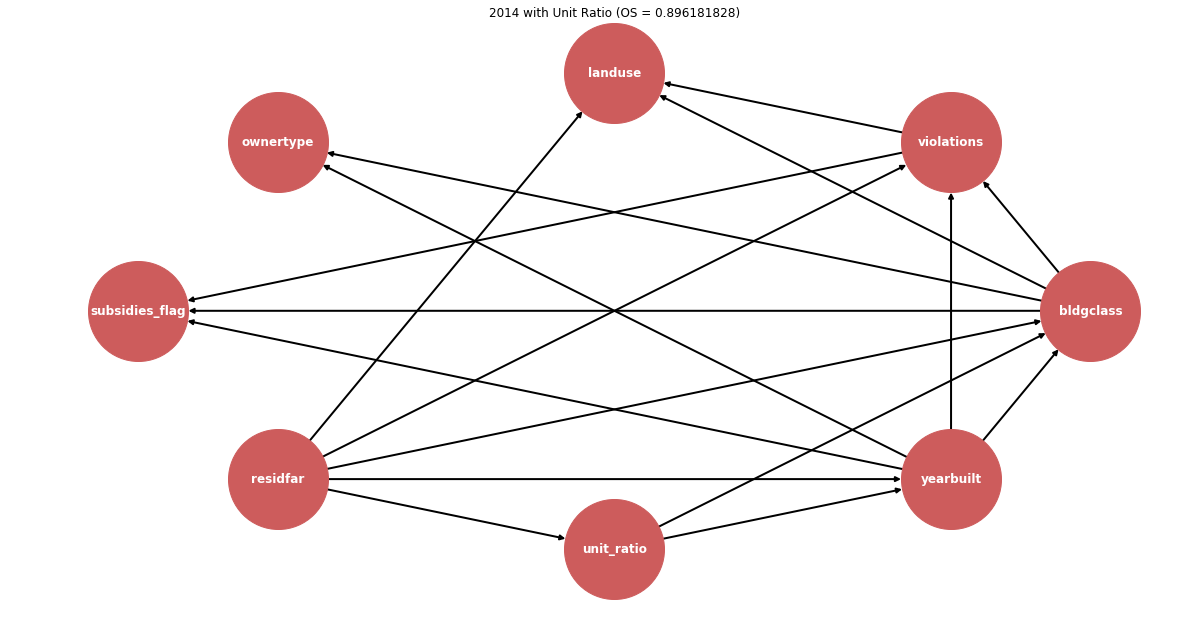

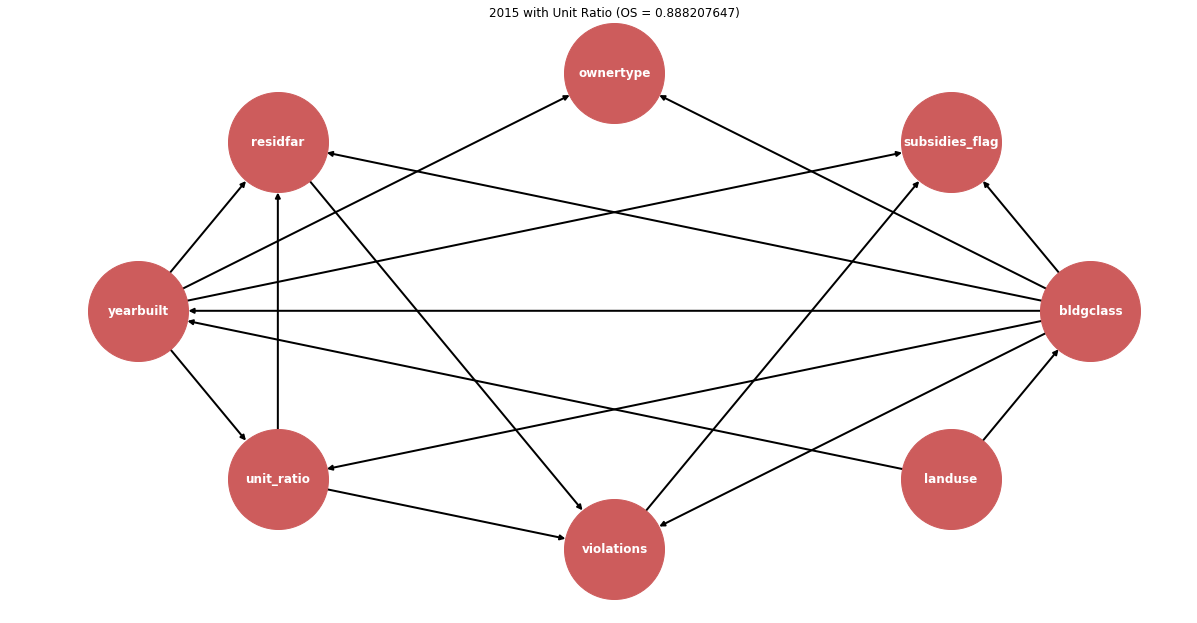

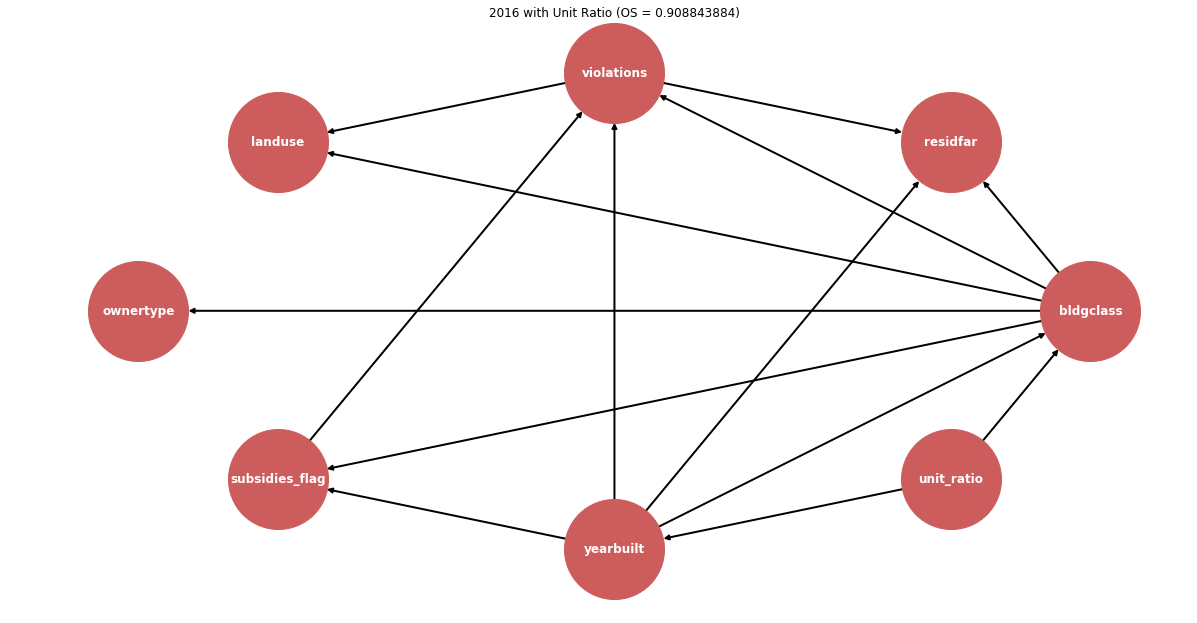

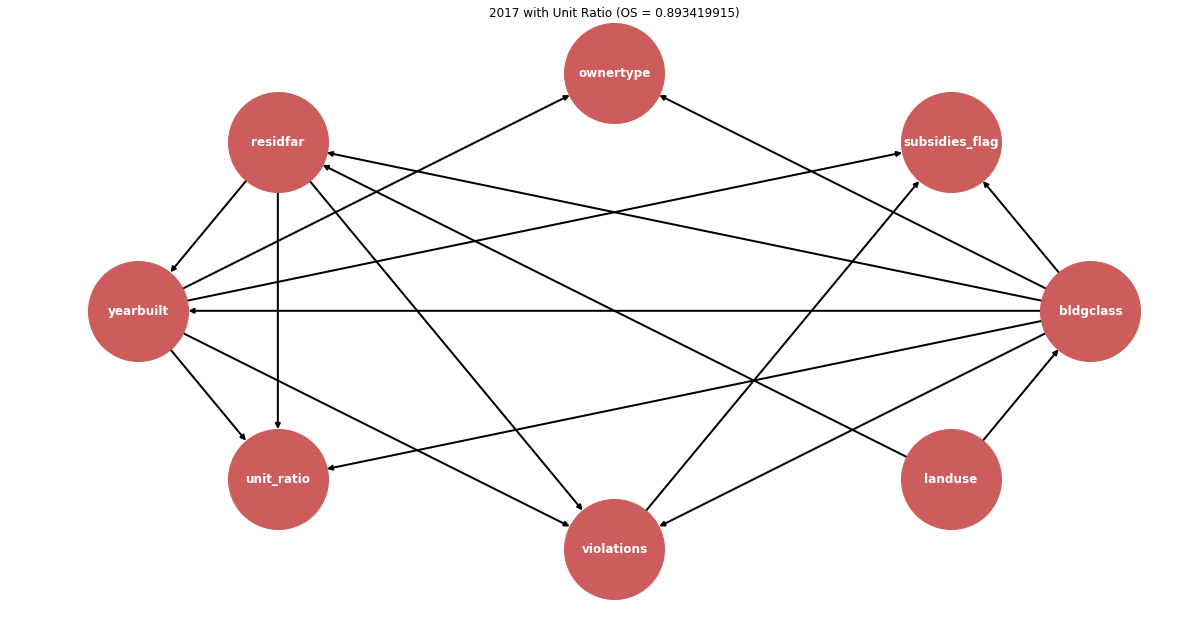

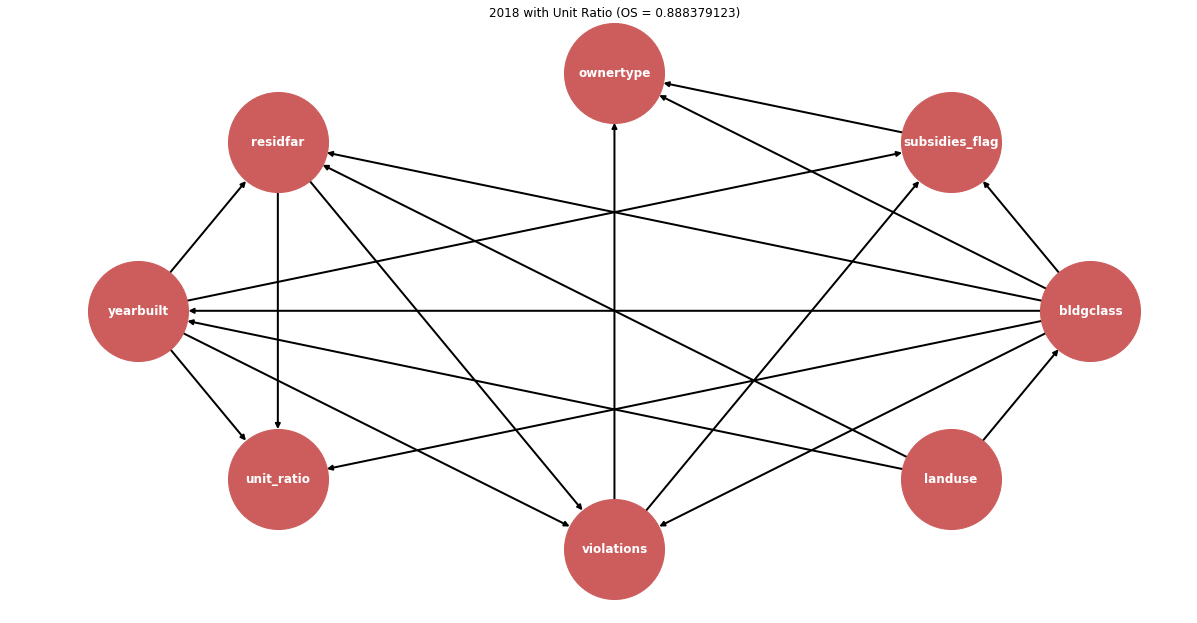

In [72]:
for i in range(5):
    g = nx.DiGraph()
    g.add_edges_from(ur[i])
    plt.figure(figsize=(16,8))
    nx.draw_shell(g,
            with_labels=True,
            font_weight='bold',
            font_color='white',
            node_size=10000,
            node_color='indianred',
            width=2)
    plt.title('{} with Unit Ratio (OS = {})'.format(year[i], urOS[i]))
    plt.savefig('edges ur ({}).png'.format(year[i]))

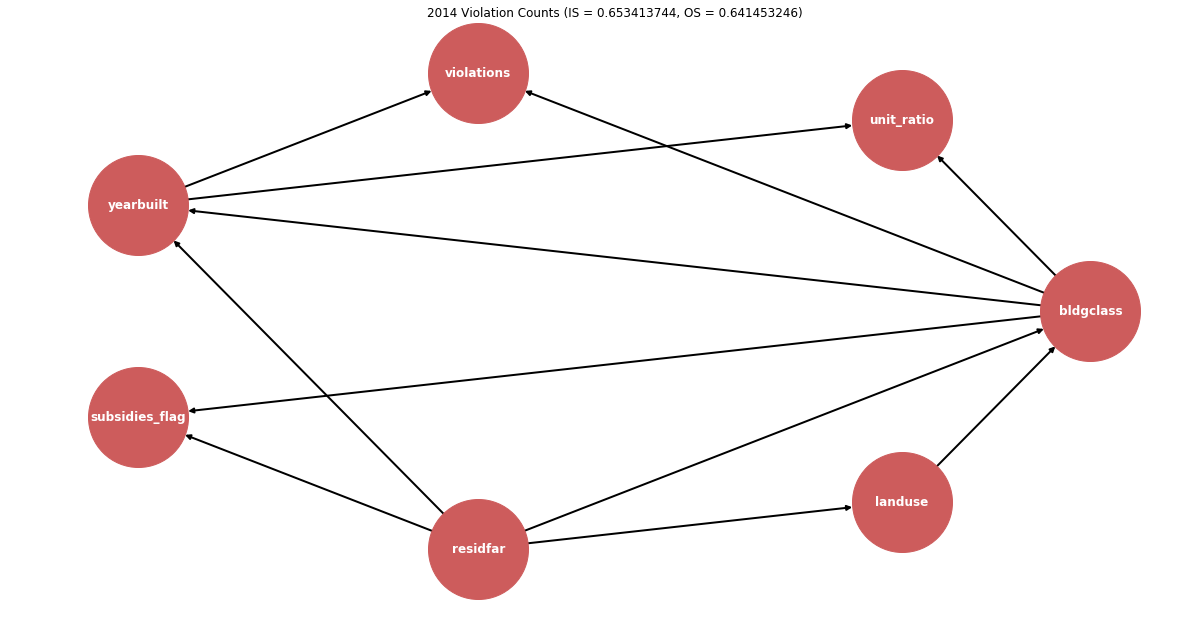

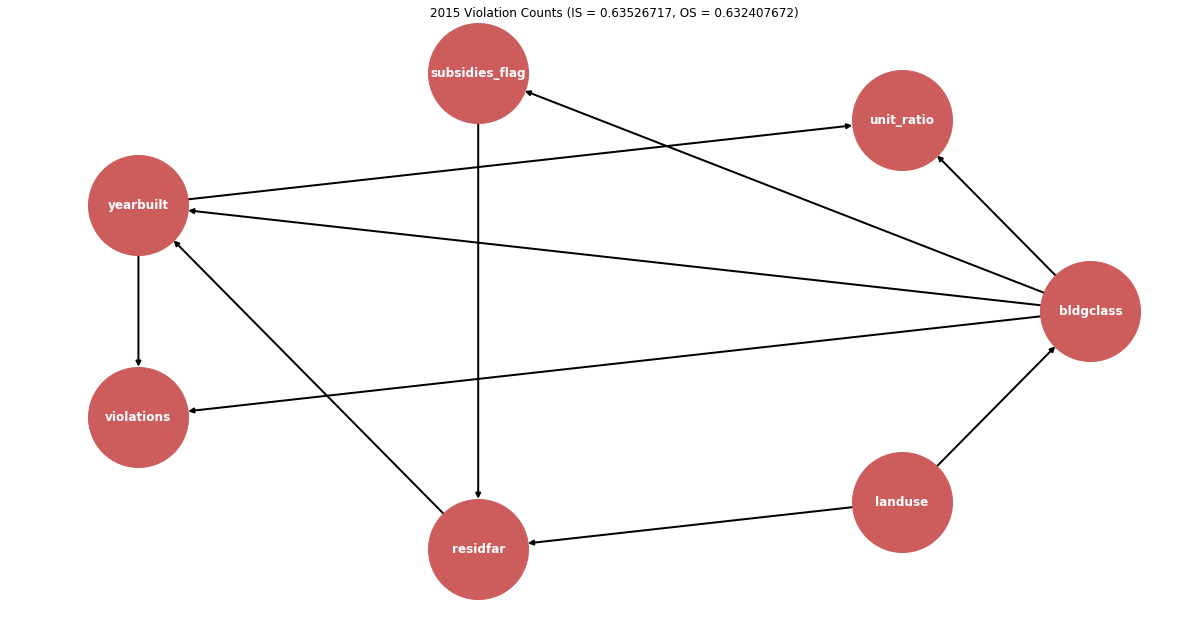

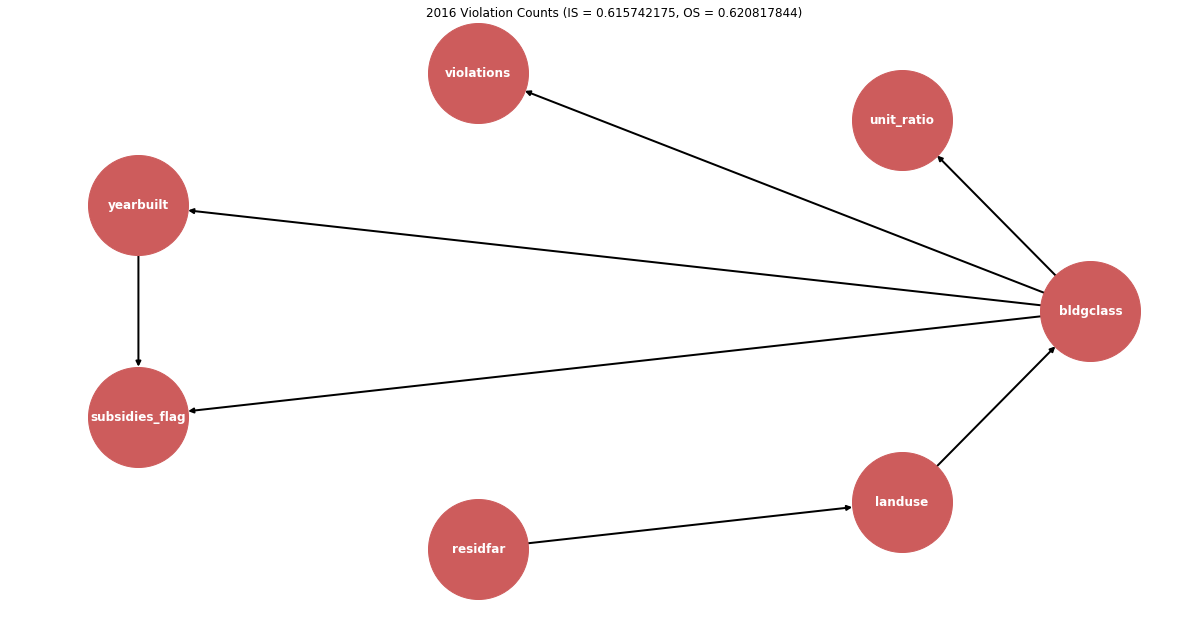

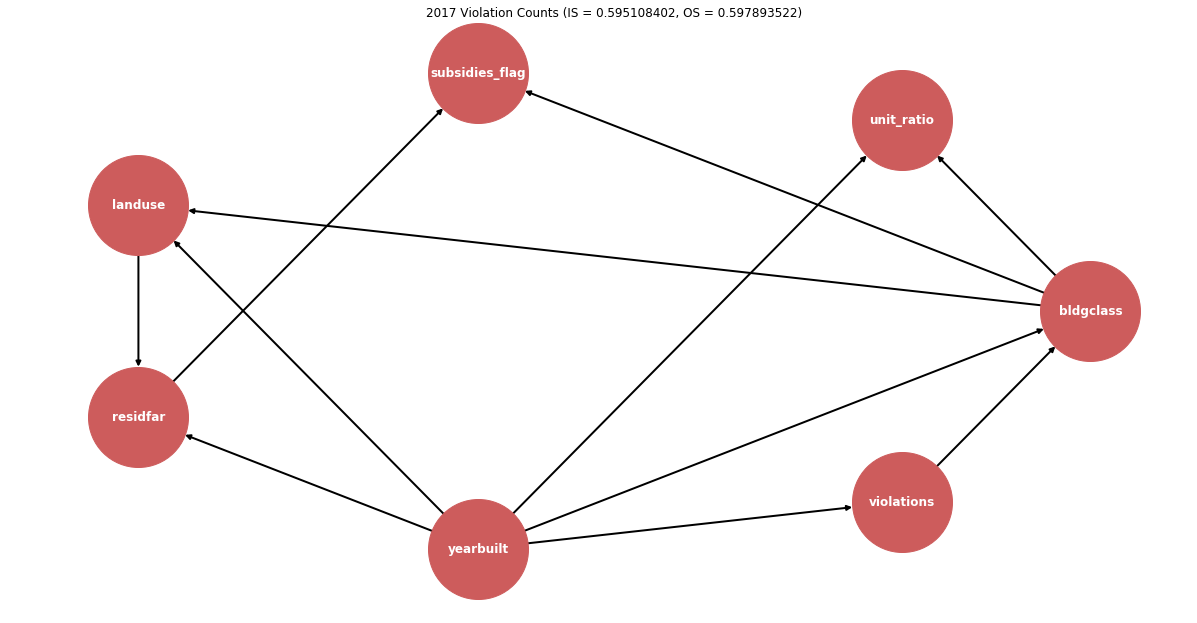

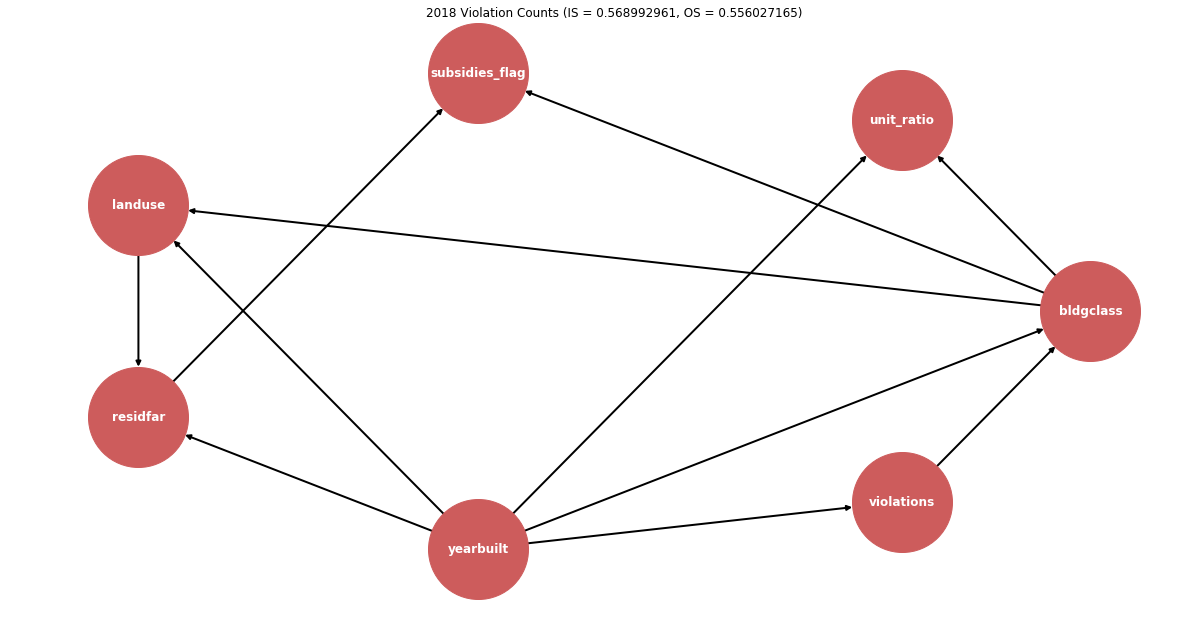

In [66]:
for i in range(5):
    g = nx.DiGraph()
    g.add_edges_from(vio_count[i])
    plt.figure(figsize=(16,8))
    nx.draw_shell(g,
            with_labels=True,
            font_weight='bold',
            font_color='white',
            node_size=10000,
            node_color='indianred',
            width=2)
    plt.title('{} Violation Counts (IS = {}, OS = {})'.format(year[i], vio_countIS[i], vio_countOS[i]))
    plt.savefig('edges vio_count ({}).png'.format(year[i]))

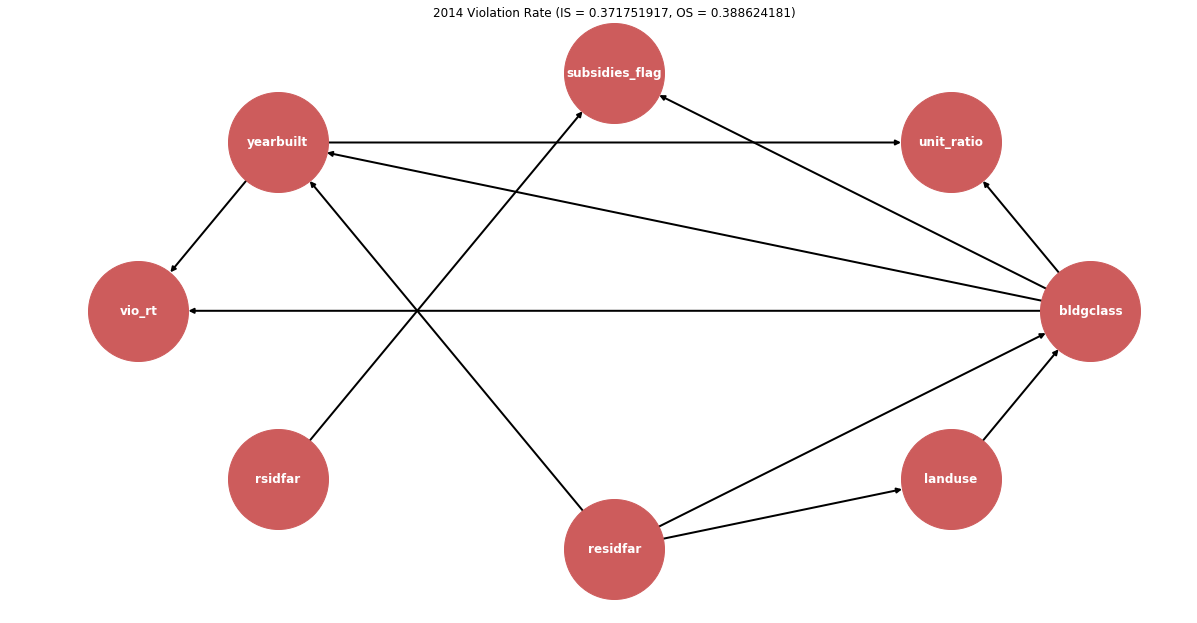

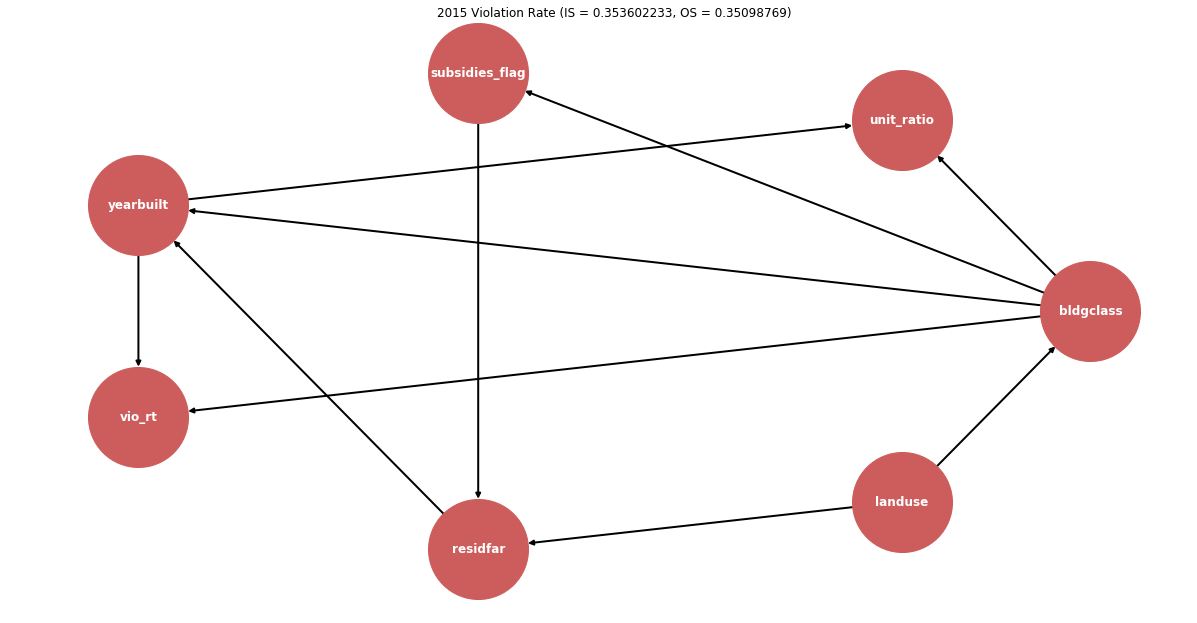

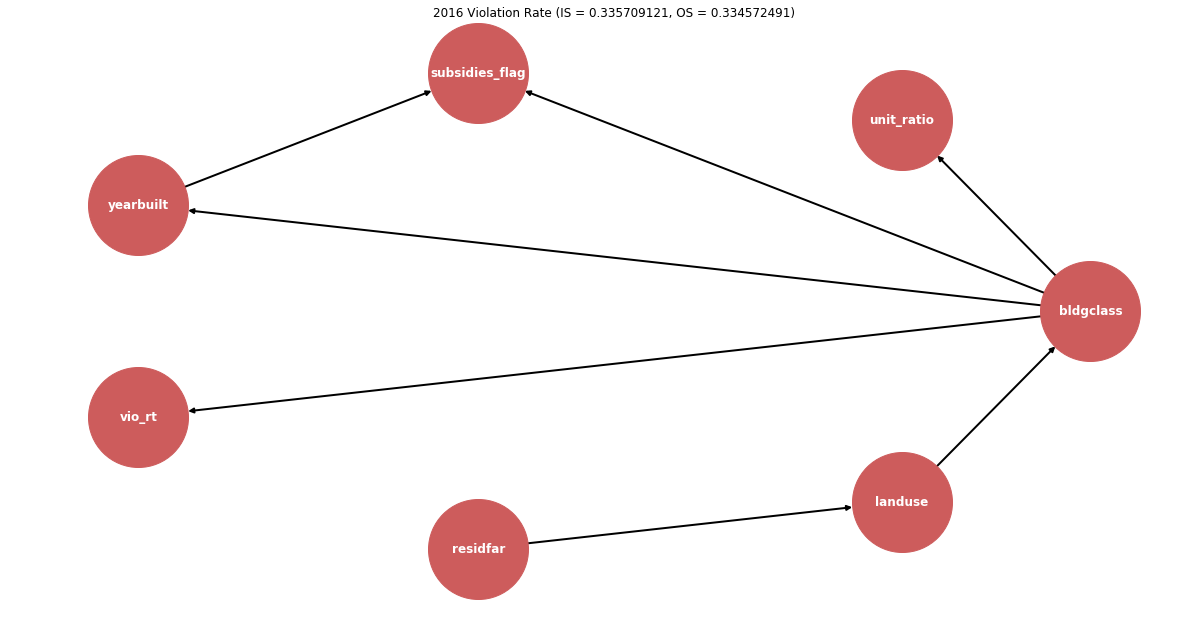

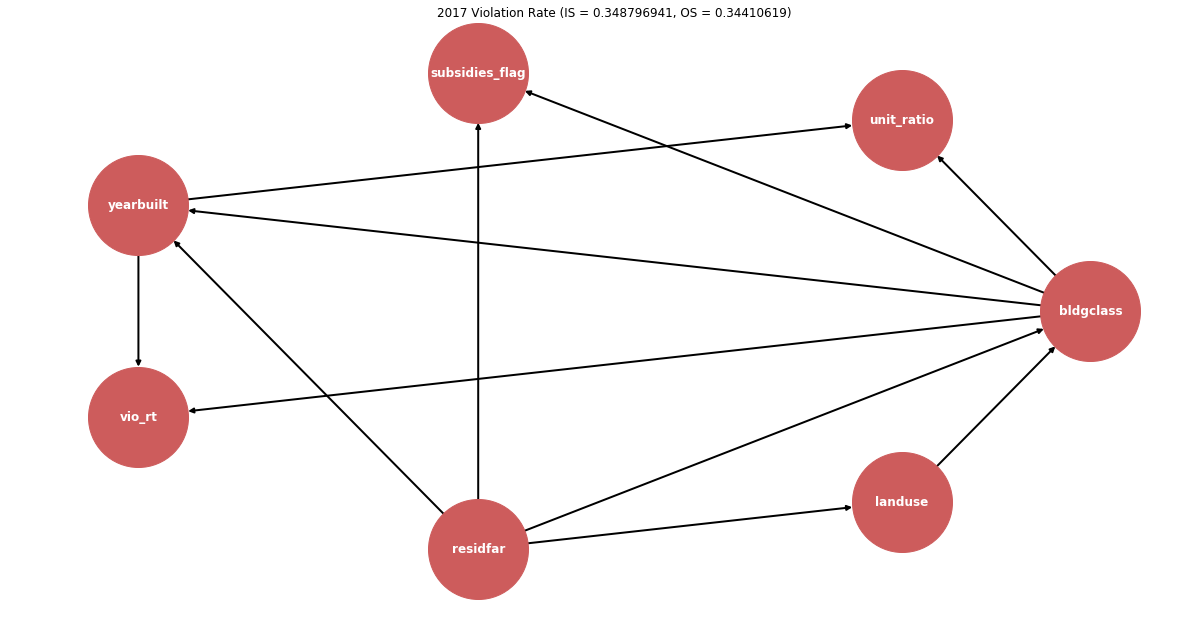

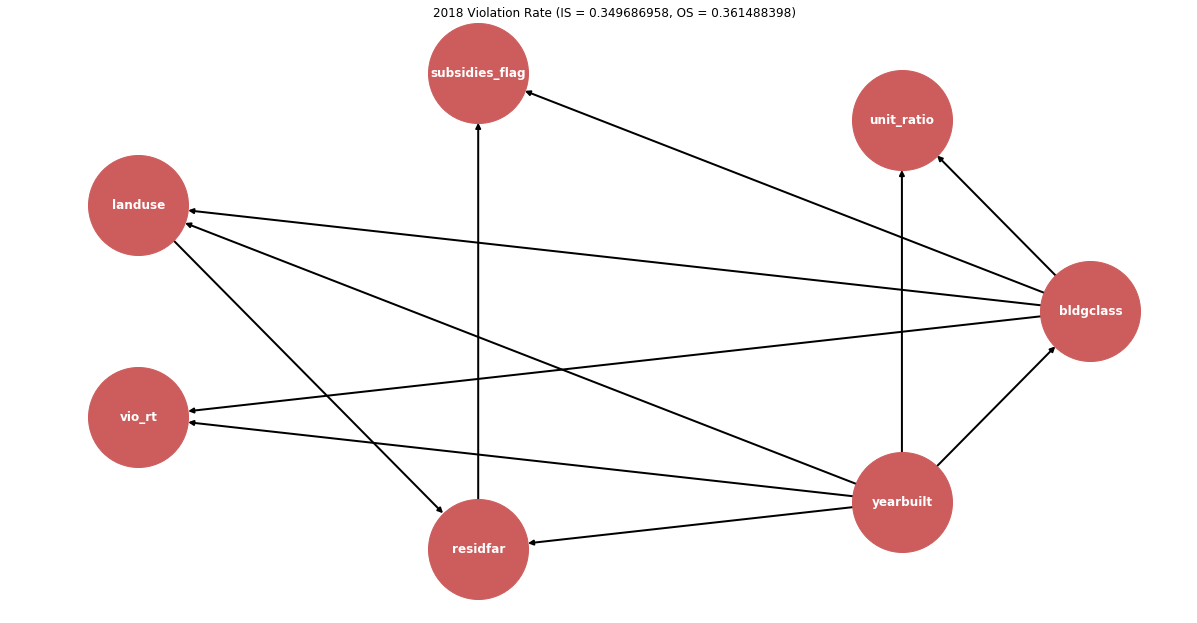

In [68]:
for i in range(5):
    g = nx.DiGraph()
    g.add_edges_from(vio_rt[i])
    plt.figure(figsize=(16,8))
    nx.draw_shell(g,
            with_labels=True,
            font_weight='bold',
            font_color='white',
            node_size=10000,
            node_color='indianred',
            width=2)
    plt.title('{} Violation Rate (IS = {}, OS = {})'.format(year[i], vio_rtIS[i], vio_rtOS[i]))
    plt.savefig('edges vio_rt ({}).png'.format(year[i]))

# Census Tract Level

In [80]:
names = ['total14', 'classC14', 'total15', 'classC15', 'total16', 'classC16', 'total17', 'classC17']

edges = [[('pop_pov_pct', 'hh_inc_med'), ('pop_pov_pct', 'pop_65p_pct'), ('crime_viol_rt', 'crime_prop_rt'), ('hh_inc_med', 'crime_viol_rt'), ('hh_inc_med', 'pop_school_priv_5_17_pct'), ('hh_inc_med', 'rent_burden_sev_pct'), ('hh_inc_med', 'pop_rent_pct'), ('hh_inc_med', 'rent_gross_med'), ('hh_inc_med', 'pop_edu_nohs_pct'), ('rent_gross_med', 'pop_disabled_pct'), ('rent_gross_med', 'hh_alone_pct'), ('pop_rent_pct', 'total_vio_count'), ('hh_alone_pct', 'unit_occ_hhsize_avg'), ('pop_edu_nohs_pct', 'pop_lim_eng_pct'), ('unit_occ_hhsize_avg', 'own_burden_pct'), ('total_vio_count', 'pop_num')],
         [('unit_occ_hhsize_avg', 'hh_u18_pct'), ('pop_rent_pct', 'unit_occ_rent_sevcrowd_pct'), ('pop_rent_pct', 'pop_5p_units_pct'), ('pop_rent_pct', 'pop_commute_pubtrans_pct'), ('pop_rent_pct', 'class_C_count'), ('class_C_count', 'crime_viol_rt'), ('pop_5p_units_pct', 'hh_alone_pct'), ('pop_5p_units_pct', 'own_burden_pct'), ('pop_edu_nohs_pct', 'pop_pov_pct'), ('crime_viol_rt', 'crime_prop_rt'), ('crime_viol_rt', 'pop_school_priv_5_17_pct'), ('pop_lim_eng_pct', 'pop_edu_nohs_pct'), ('pop_foreign_pct', 'pop_lim_eng_pct'), ('pop_foreign_pct', 'unit_occ_rent_nochild_pct'), ('rent_gross_med', 'pop_disabled_pct'), ('hh_alone_pct', 'unit_occ_hhsize_avg'), ('hh_u18_pct', 'rent_burden_sev_pct'), ('hh_u18_pct', 'pop_commute_time_avg'), ('hh_u18_pct', 'pop_65p_pct'), ('pop_pov_pct', 'hh_gini_idx'), ('pop_pov_pct', 'pop_rent_pct'), ('pop_pov_pct', 'rent_gross_med')],
         [('unit_occ_hhsize_avg', 'hh_u18_pct'), ('unit_occ_hhsize_avg', 'rent_burden_sev_pct'), ('pop_rent_pct', 'unit_occ_rent_sevcrowd_pct'), ('pop_rent_pct', 'pop_commute_pubtrans_pct'), ('pop_rent_pct', 'total_vio_count'), ('pop_5p_units_pct', 'hh_alone_pct'), ('pop_5p_units_pct', 'own_burden_pct'), ('pop_5p_units_pct', 'pop_rent_pct'), ('pop_edu_nohs_pct', 'pop_pov_pct'), ('pop_edu_nohs_pct', 'pop_school_priv_5_17_pct'), ('crime_viol_rt', 'crime_prop_rt'), ('pop_lim_eng_pct', 'pop_edu_nohs_pct'), ('pop_lim_eng_pct', 'pop_foreign_pct'), ('hh_gini_idx', 'pop_5p_units_pct'), ('rent_gross_med', 'pop_disabled_pct'), ('hh_alone_pct', 'unit_occ_hhsize_avg'), ('hh_alone_pct', 'unit_occ_rent_nochild_pct'), ('hh_u18_pct', 'pop_commute_time_avg'), ('hh_u18_pct', 'pop_65p_pct'), ('pop_pov_pct', 'crime_viol_rt'), ('pop_pov_pct', 'hh_gini_idx'), ('pop_pov_pct', 'rent_gross_med')],
         [('pop_pov_pct', 'pop_lim_eng_pct'), ('crime_viol_rt', 'class_C_count'), ('class_C_count', 'pop_pov_pct'), ('class_C_count', 'pop_65p_pct'), ('crime_prop_rt', 'crime_viol_rt')],
         [('unit_occ_hhsize_avg', 'hh_alone_pct'), ('unit_occ_hhsize_avg', 'hh_u18_pct'), ('unit_occ_hhsize_avg', 'rent_burden_sev_pct'), ('unit_occ_hhsize_avg', 'pop_foreign_pct'), ('pop_rent_pct', 'pop_pov_pct'), ('pop_rent_pct', 'unit_occ_rent_sevcrowd_pct'), ('pop_rent_pct', 'total_vio_count'), ('pop_rent_pct', 'pop_commute_pubtrans_pct'), ('pop_5p_units_pct', 'own_burden_pct'), ('pop_5p_units_pct', 'hh_gini_idx'), ('pop_5p_units_pct', 'pop_rent_pct'), ('pop_edu_nohs_pct', 'pop_school_priv_5_17_pct'), ('crime_viol_rt', 'crime_prop_rt'), ('pop_foreign_pct', 'pop_lim_eng_pct'), ('total_vio_count', 'crime_viol_rt'), ('rent_gross_med', 'pop_disabled_pct'), ('hh_alone_pct', 'pop_5p_units_pct'), ('hh_alone_pct', 'unit_occ_rent_nochild_pct'), ('hh_u18_pct', 'pop_commute_time_avg'), ('hh_u18_pct', 'pop_65p_pct'), ('pop_pov_pct', 'pop_edu_nohs_pct'), ('pop_pov_pct', 'rent_gross_med')],
         [('pop_pov_pct', 'unit_occ_rent_sevcrowd_pct'), ('pop_pov_pct', 'class_C_count'), ('crime_viol_rt', 'crime_prop_rt'), ('rent_gross_med', 'hh_inc_med'), ('pop_edu_collp_pct', 'pop_nonfam_pct'), ('class_C_count', 'crime_viol_rt'), ('hh_inc_med', 'pop_pov_pct'), ('hh_inc_med', 'pop_edu_collp_pct'), ('hh_inc_med', 'hh_gini_idx')],
         [('pop_pov_pct', 'pop_lim_eng_pct'), ('pop_pov_pct', 'pop_rent_pct'), ('crime_viol_rt', 'crime_prop_rt'), ('pop_rent_pct', 'pop_65p_pct'), ('pop_rent_pct', 'total_vio_count'), ('total_vio_count', 'crime_viol_rt')],
         [('pop_pov_pct', 'hh_gini_idx'), ('pop_pov_pct', 'class_C_count'), ('crime_viol_rt', 'crime_prop_rt'), ('pop_commute_carfree_pct', 'unit_occ_rent_sevcrowd_pct'), ('pop_commute_carfree_pct', 'pop_5p_units_pct'), ('rent_gross_med', 'pop_pov_pct'), ('rent_gross_med', 'pop_disabled_pct'), ('hh_family_pct', 'pop_edu_collp_pct'), ('pop_edu_collp_pct', 'own_burden_pct'), ('pop_edu_collp_pct', 'rent_burden_sev_pct'), ('pop_edu_collp_pct', 'rent_gross_med'), ('pop_5p_units_pct', 'hh_family_pct'), ('class_C_count', 'crime_viol_rt'), ('class_C_count', 'pop_65p_pct')]]

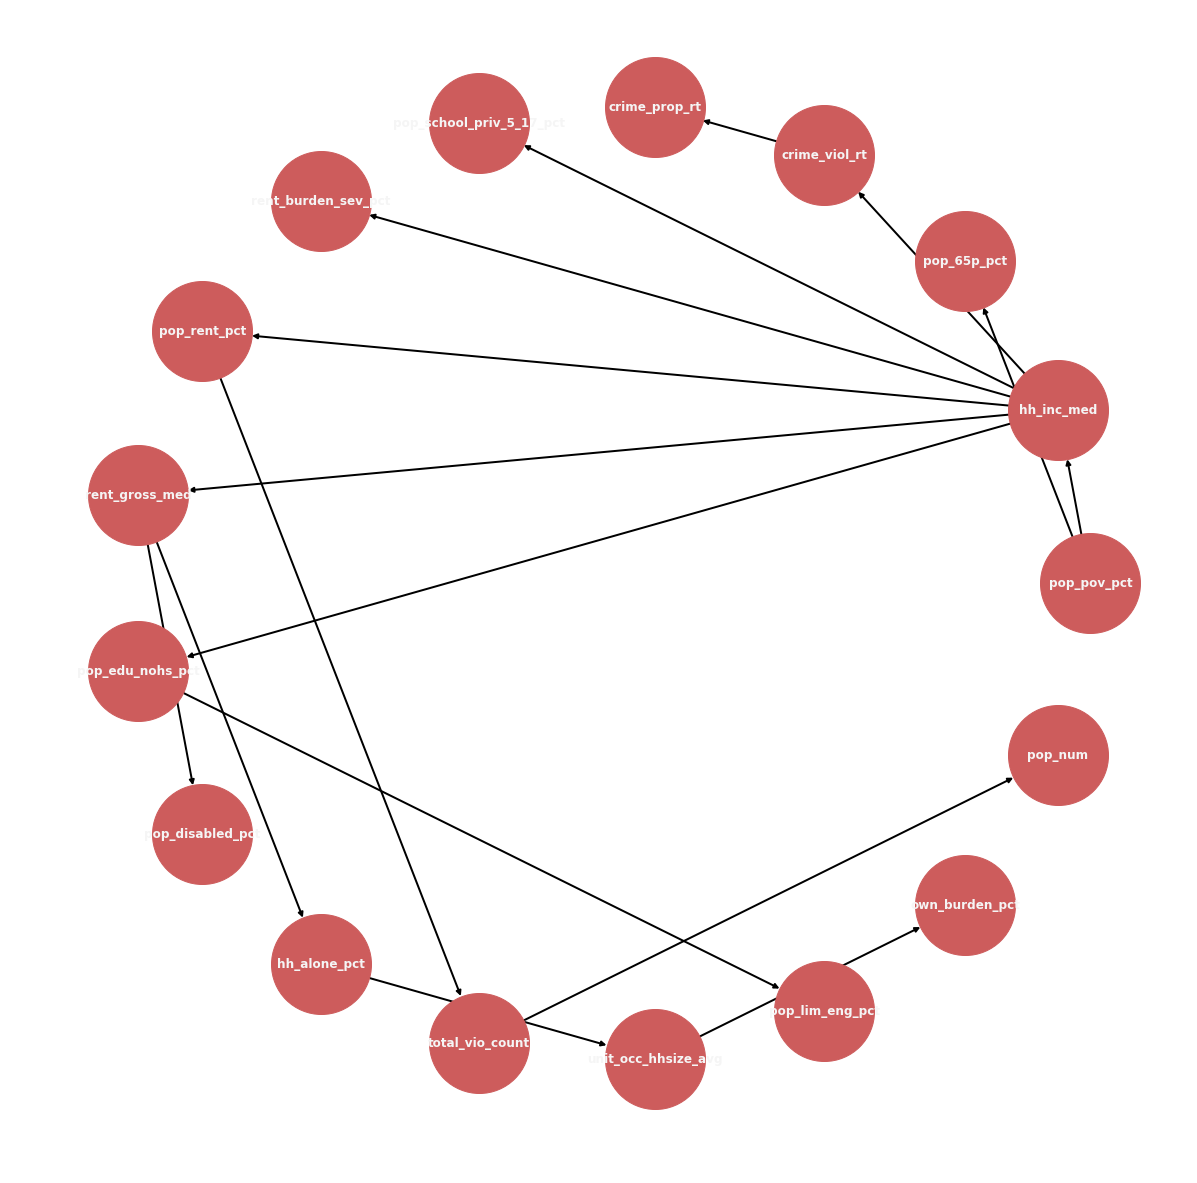

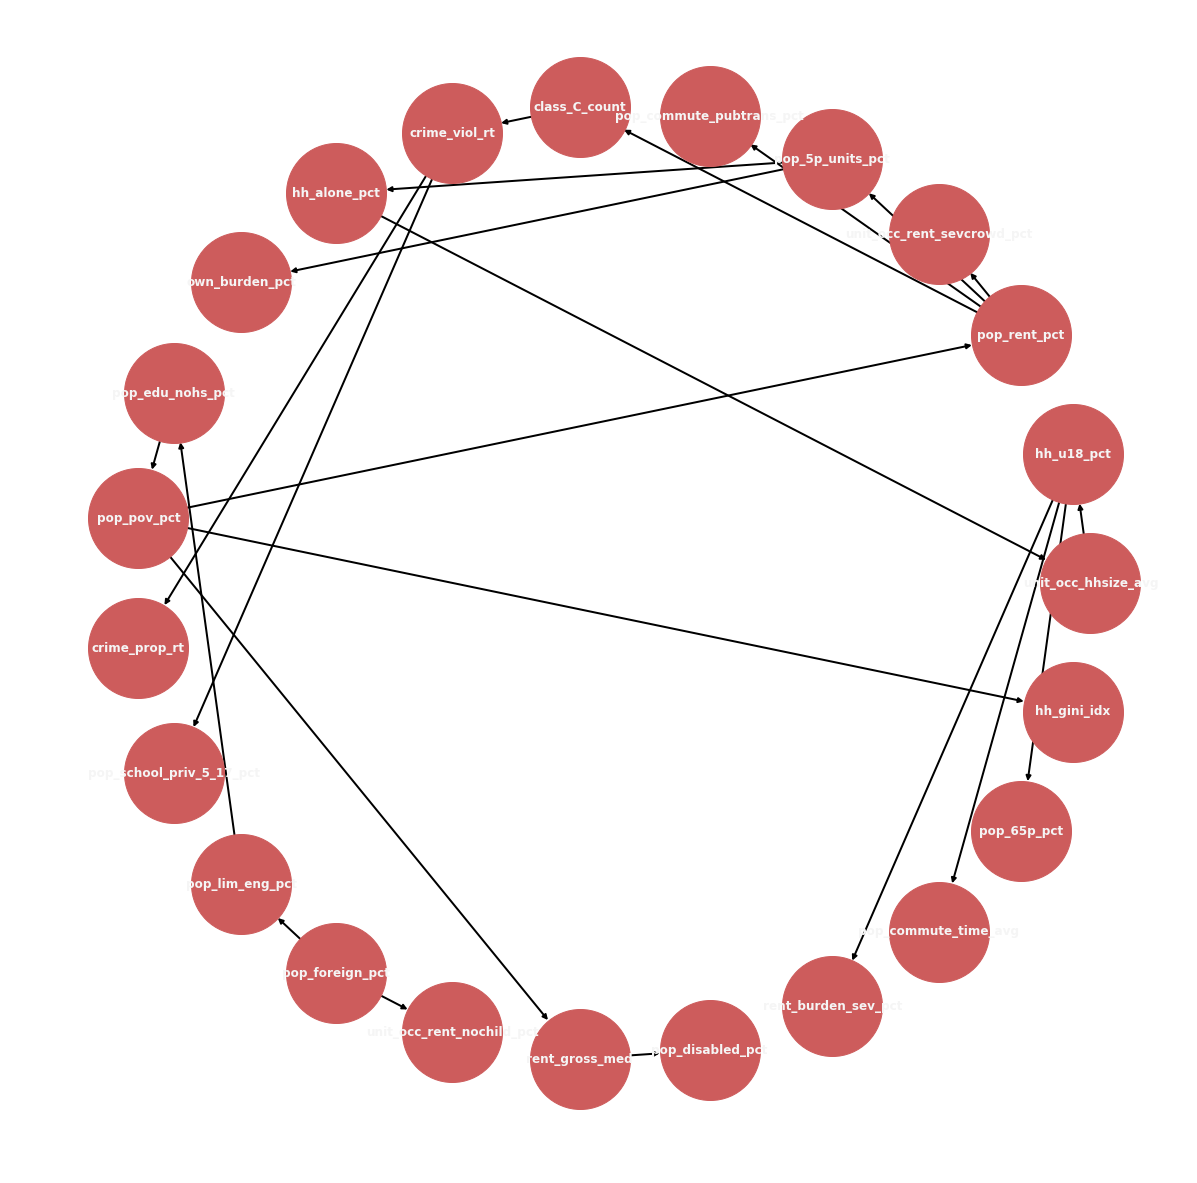

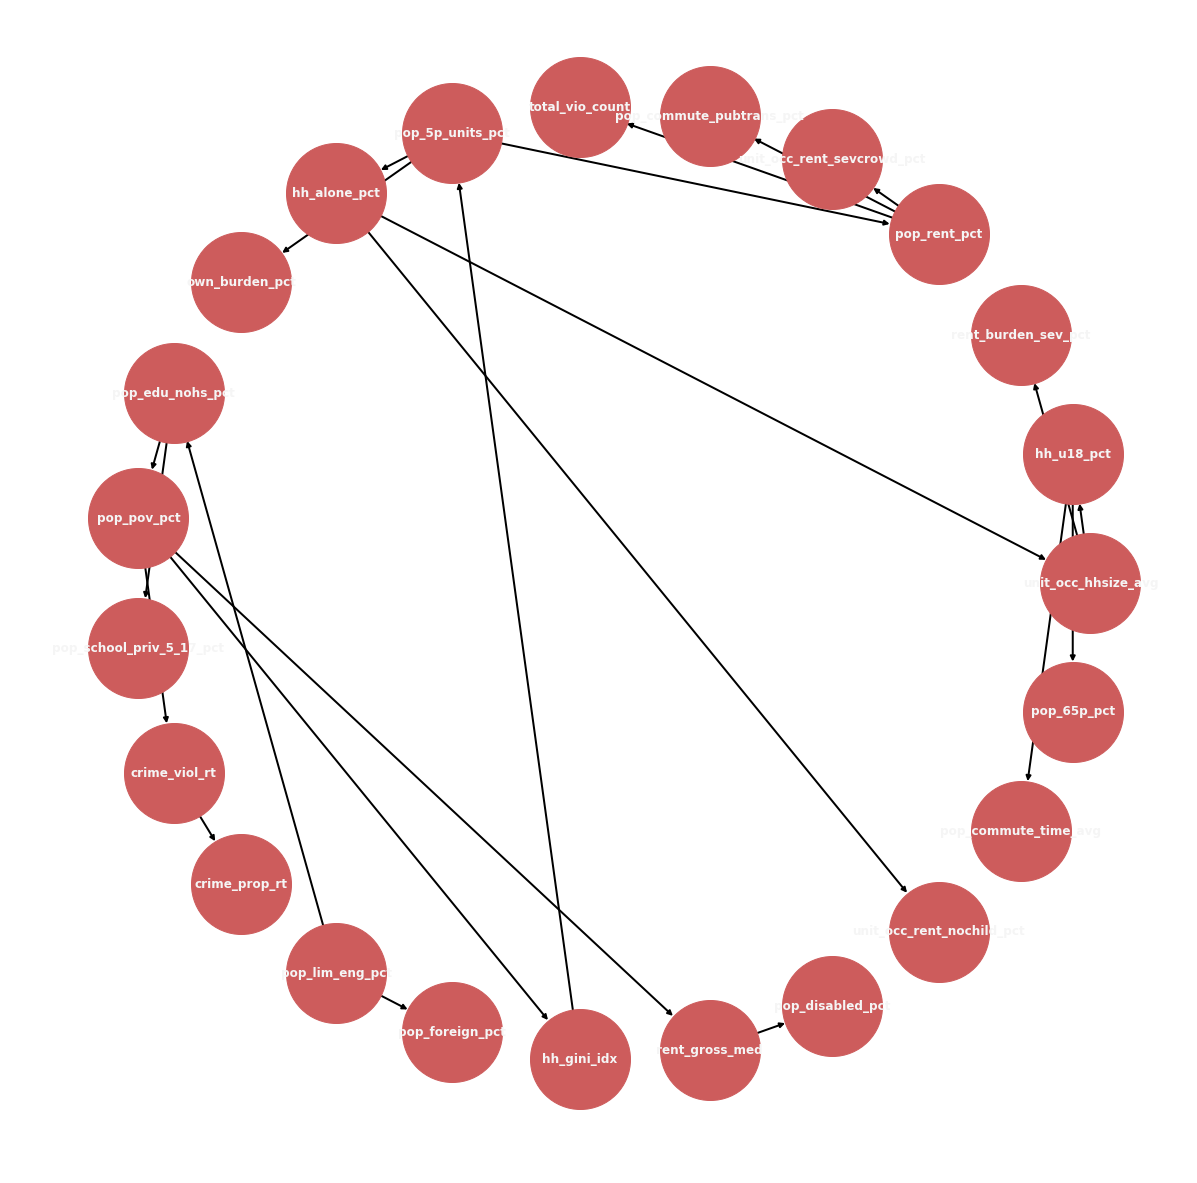

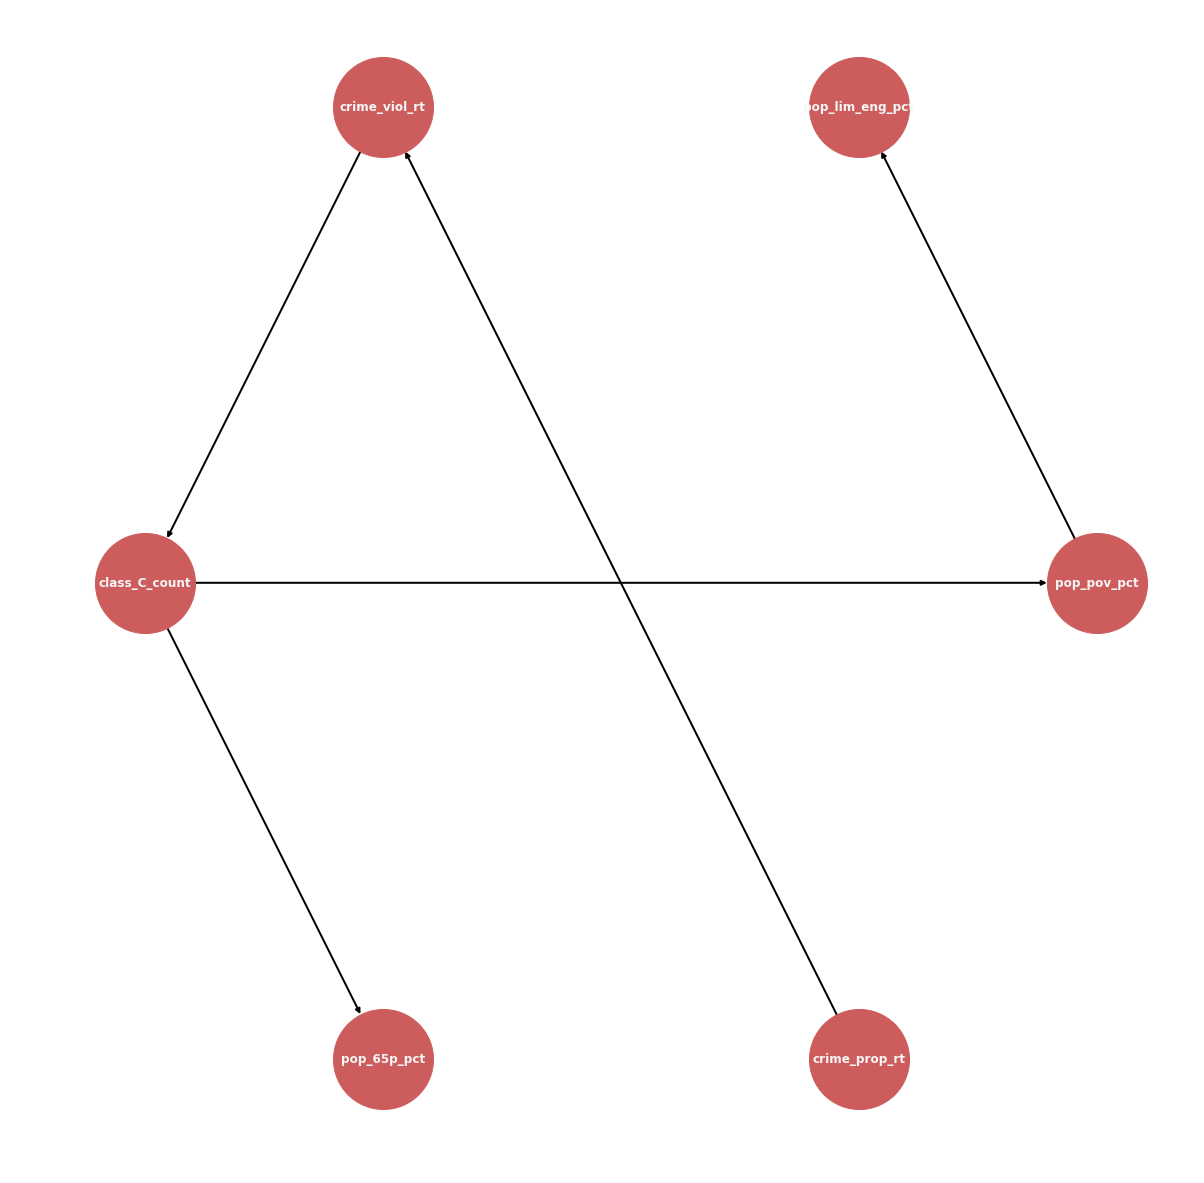

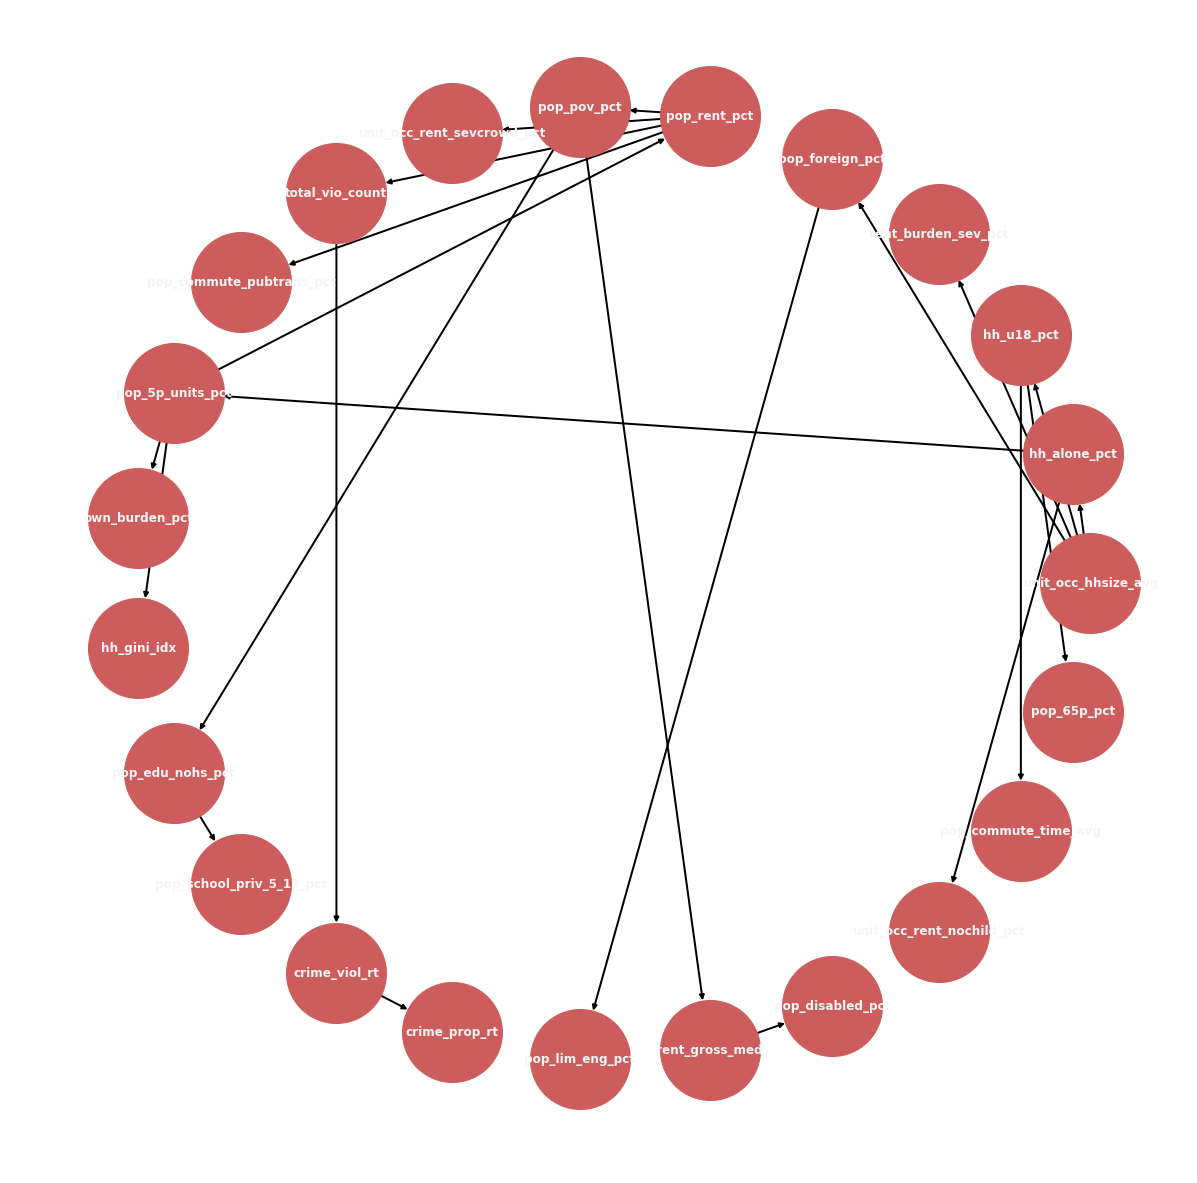

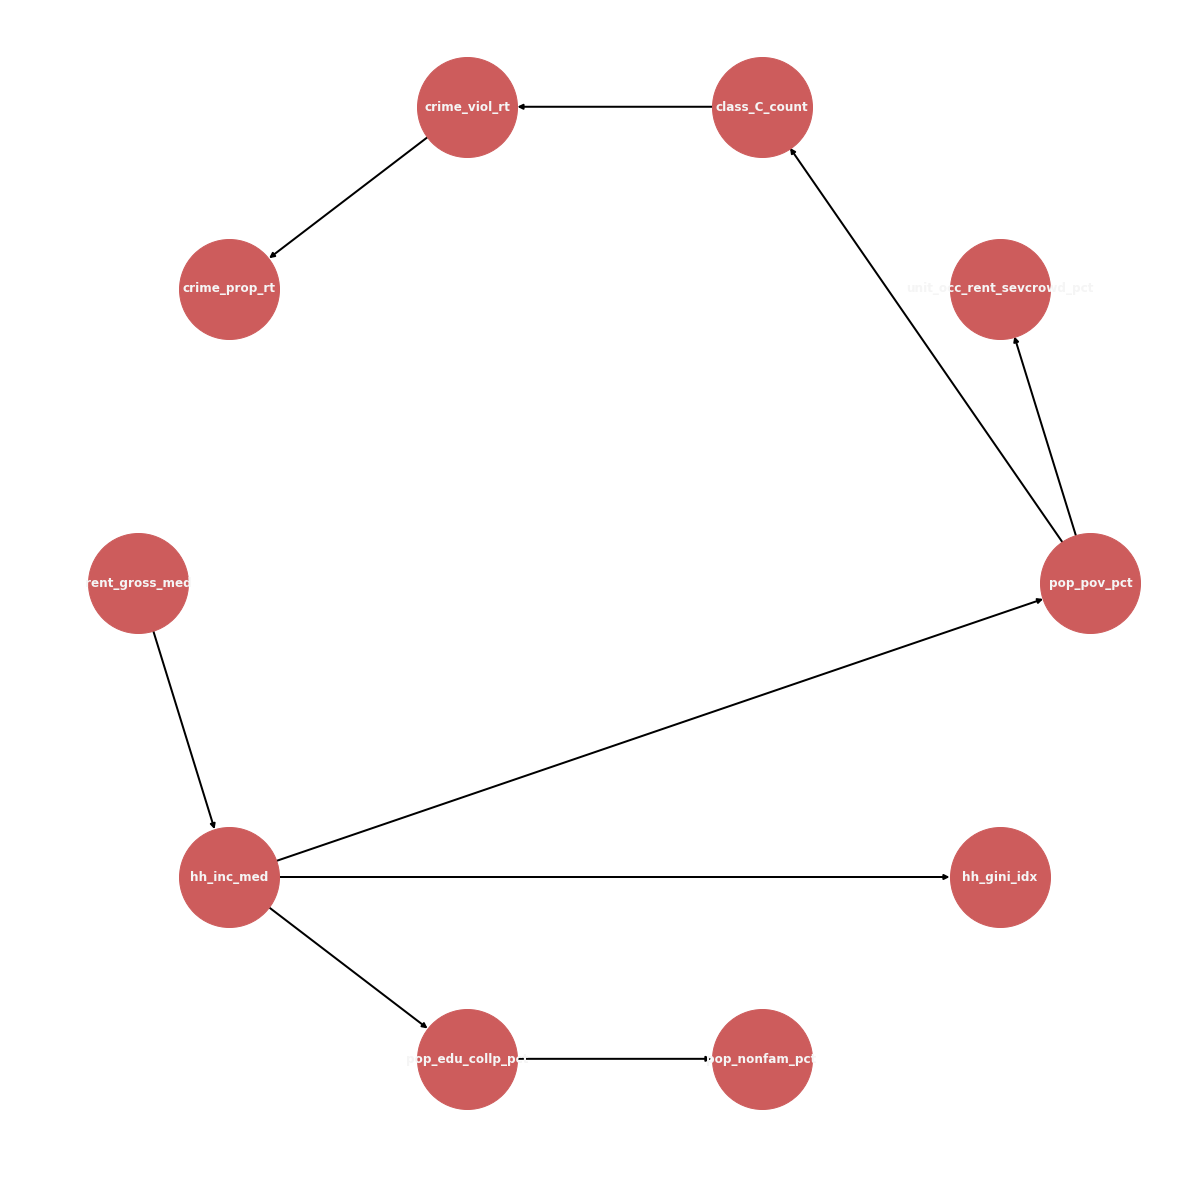

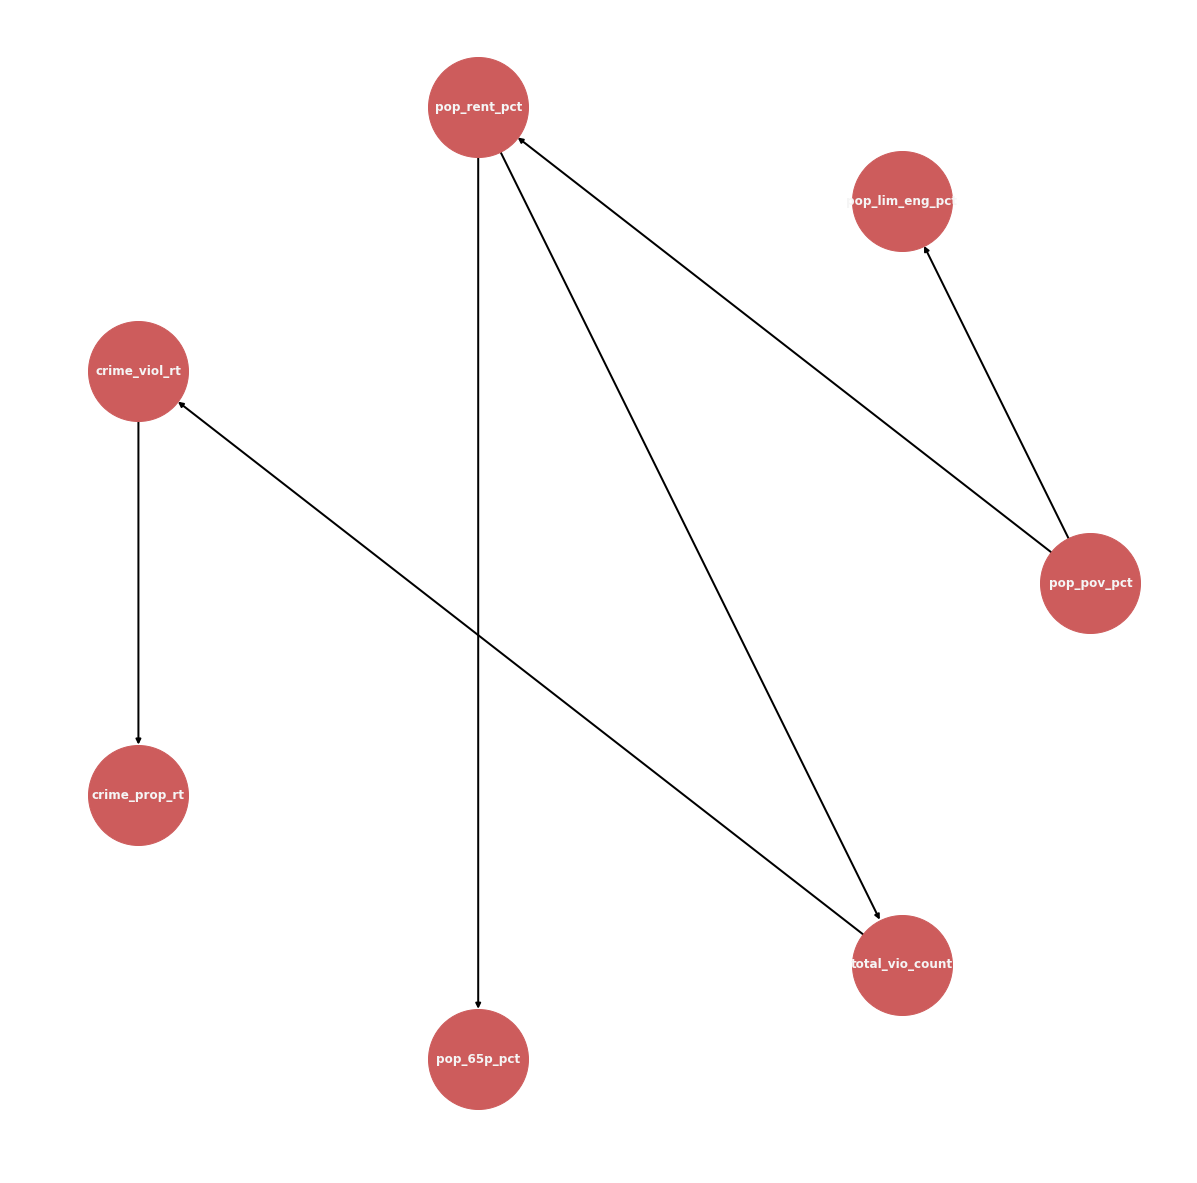

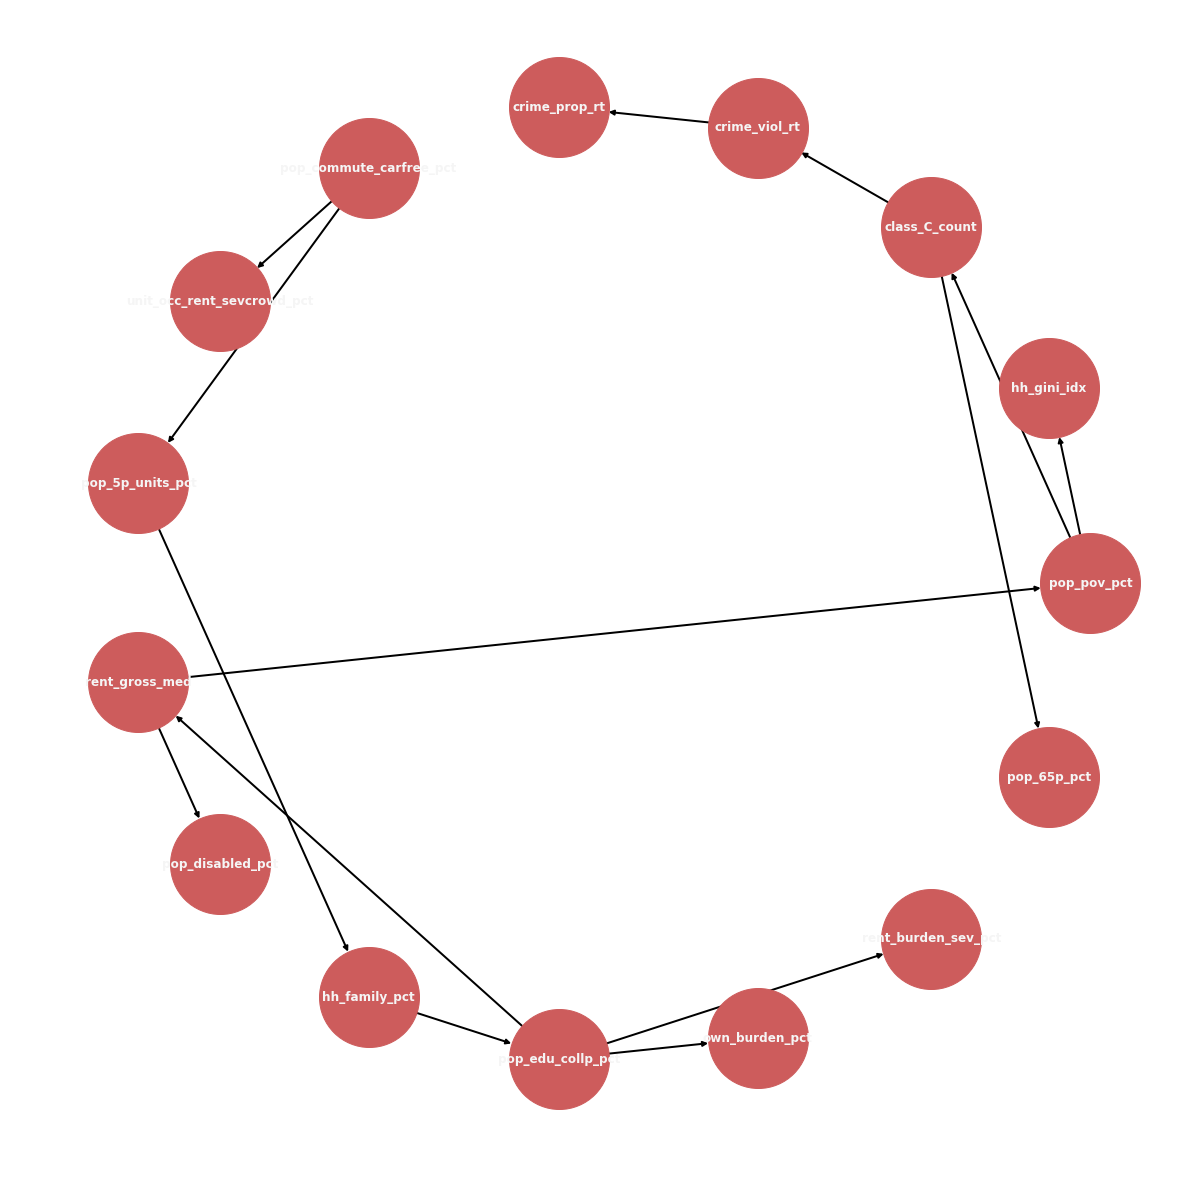

In [84]:
for i in range(8):
    g = nx.DiGraph()
    g.add_edges_from(edges[i])
    plt.figure(figsize=(16,16))
    nx.draw_shell(g,
            with_labels=True,
            font_weight='bold',
            font_color='whitesmoke',
            node_size=10000,
            node_color='indianred',
            width=2)
    plt.savefig('ct edges ({}).png'.format(names[i]))

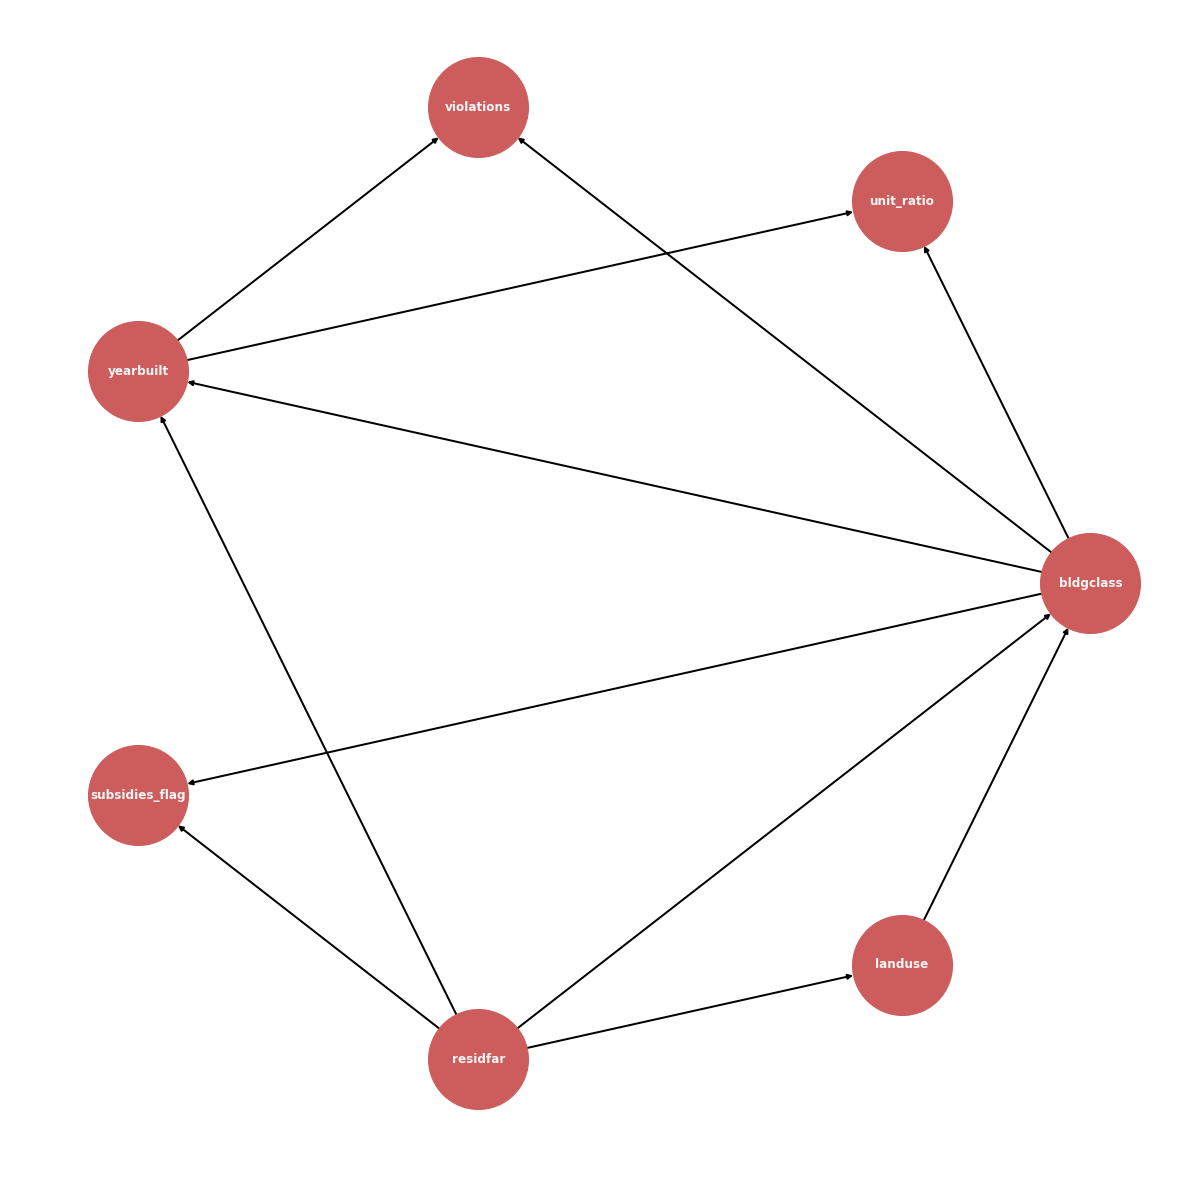

In [87]:
newedge = [('bldgclass', 'unit_ratio'), ('bldgclass', 'violations'), ('bldgclass', 'yearbuilt'), ('bldgclass', 'subsidies_flag'), ('residfar', 'subsidies_flag'), ('residfar', 'landuse'), ('residfar', 'yearbuilt'), ('residfar', 'bldgclass'), ('yearbuilt', 'unit_ratio'), ('yearbuilt', 'violations'), ('landuse', 'bldgclass')]

g = nx.DiGraph()
g.add_edges_from(newedge)
plt.figure(figsize=(16,16))
nx.draw_shell(g,
        with_labels=True,
        font_weight='bold',
        font_color='whitesmoke',
        node_size=10000,
        node_color='indianred',
        width=2)
plt.savefig('newedge.png')